<a href="https://colab.research.google.com/github/anuj7169/ML/blob/main/Copy_of_ML_Expt_3B_Regression_with_Error_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2.17.1
3.5.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing=pd.read_csv("/content/housing - housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [ ]:
housing.pop('ocean_proximity')
housing.pop('total_bedrooms')

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [ ]:
hnorm=(((housing-housing.min())/(housing.max()-housing.min())))
hnorm.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
housing.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,int64
total_rooms,int64
population,int64
households,int64
median_income,float64
median_house_value,int64


In [ ]:
housing.total_rooms

,total_rooms
0,880
1,7099
2,1467
3,1274
4,1627
...,...
20635,1665
20636,697
20637,2254
20638,1860


In [ ]:
target = housing.pop('median_house_value')

In [ ]:
Y=target.values
X=hnorm.values
X

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.02055583, 0.53966842,
        0.90226638],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.18697583, 0.53802706,
        0.70824656],
       [0.21015936, 0.5642933 , 1.        , ..., 0.02894261, 0.46602805,
        0.69505074],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.07104095, 0.08276438,
        0.15938285],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.05722743, 0.09429525,
        0.14371281],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.08699227, 0.13025338,
        0.15340349]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.15)
y_train.shape
x_val=X_train[16000:]
y_val=y_train[16000:]
X_train=X_train[:16000]
y_train=y_train[:16000]

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(128, activation="relu",input_shape=(8,)),
#keras.layers.Dense(16, activation="relu"),
keras.layers.Dense(1)
])
model.compile(loss="mae", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=5,verbose=1,validation_data=(x_val, y_val))

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 204482.3125 - val_loss: 82449.1797
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72886.8828 - val_loss: 40672.4336
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25111.1680 - val_loss: 5094.9526
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4362.4600 - val_loss: 4790.6802
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4539.4121 - val_loss: 5658.7407


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'val_loss'])

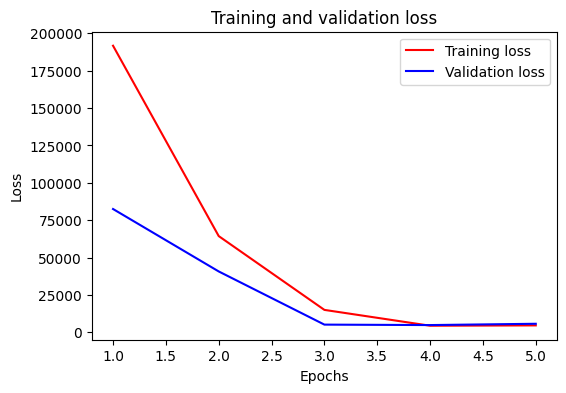

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
#acc = history_dict['accuracy']
epochs = range(1, len(loss_values)+1 )
plt.figure(figsize=(6, 4))
#plt.subplot(121)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
htest = model.evaluate(X_test, y_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5722.6309


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


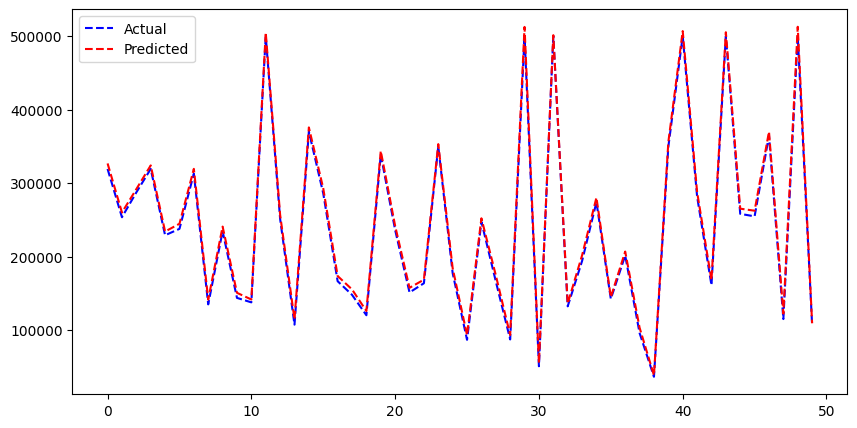

In [ ]:
X_new = X_test[:50] # pretend these are new instances
y_pred = model.predict(X_new)
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(X_new),1),y_test[:50],'b--',label='Actual')
plt.plot(np.arange(0,len(X_new),1),y_pred,'r--',label='Predicted')
plt.legend()
plt.show()
plt.show()
#plt.scatter(y_test[:20],y_pred)

[1.00363964]


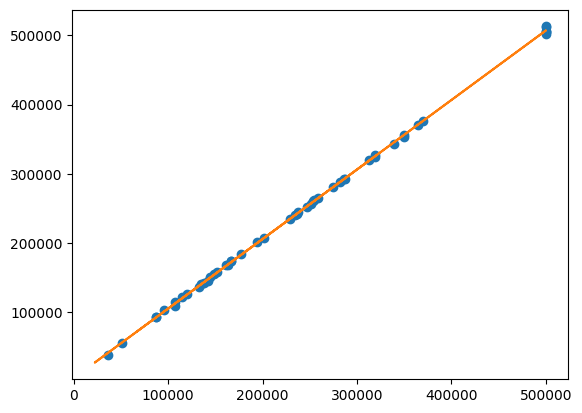

In [ ]:
X_new = X_test[:50]
plt. plot(y_test[:50],y_pred, 'o')
m, b = np. polyfit(y_test[:50],y_pred, 1)
plt. plot(y_test, m*y_test+ b)
print(m)